In [ ]:
import pandas as pd
import numpy as np

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import altair as alt

#Library for building machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Dataset Discovery

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls", sep = ',', header = 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


In [ ]:
# check if dataset has duplicate lines
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [ ]:
# Statistics of numerical columns
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
missing_rate,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Statistics of category columns
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



*    Numeric data columns and categorical data columns have no missing values.
*   The min, lower quartile, median, upper quartile and max values do not show anomalies so we do not need to perform preprocessing steps for these numeric attributes.



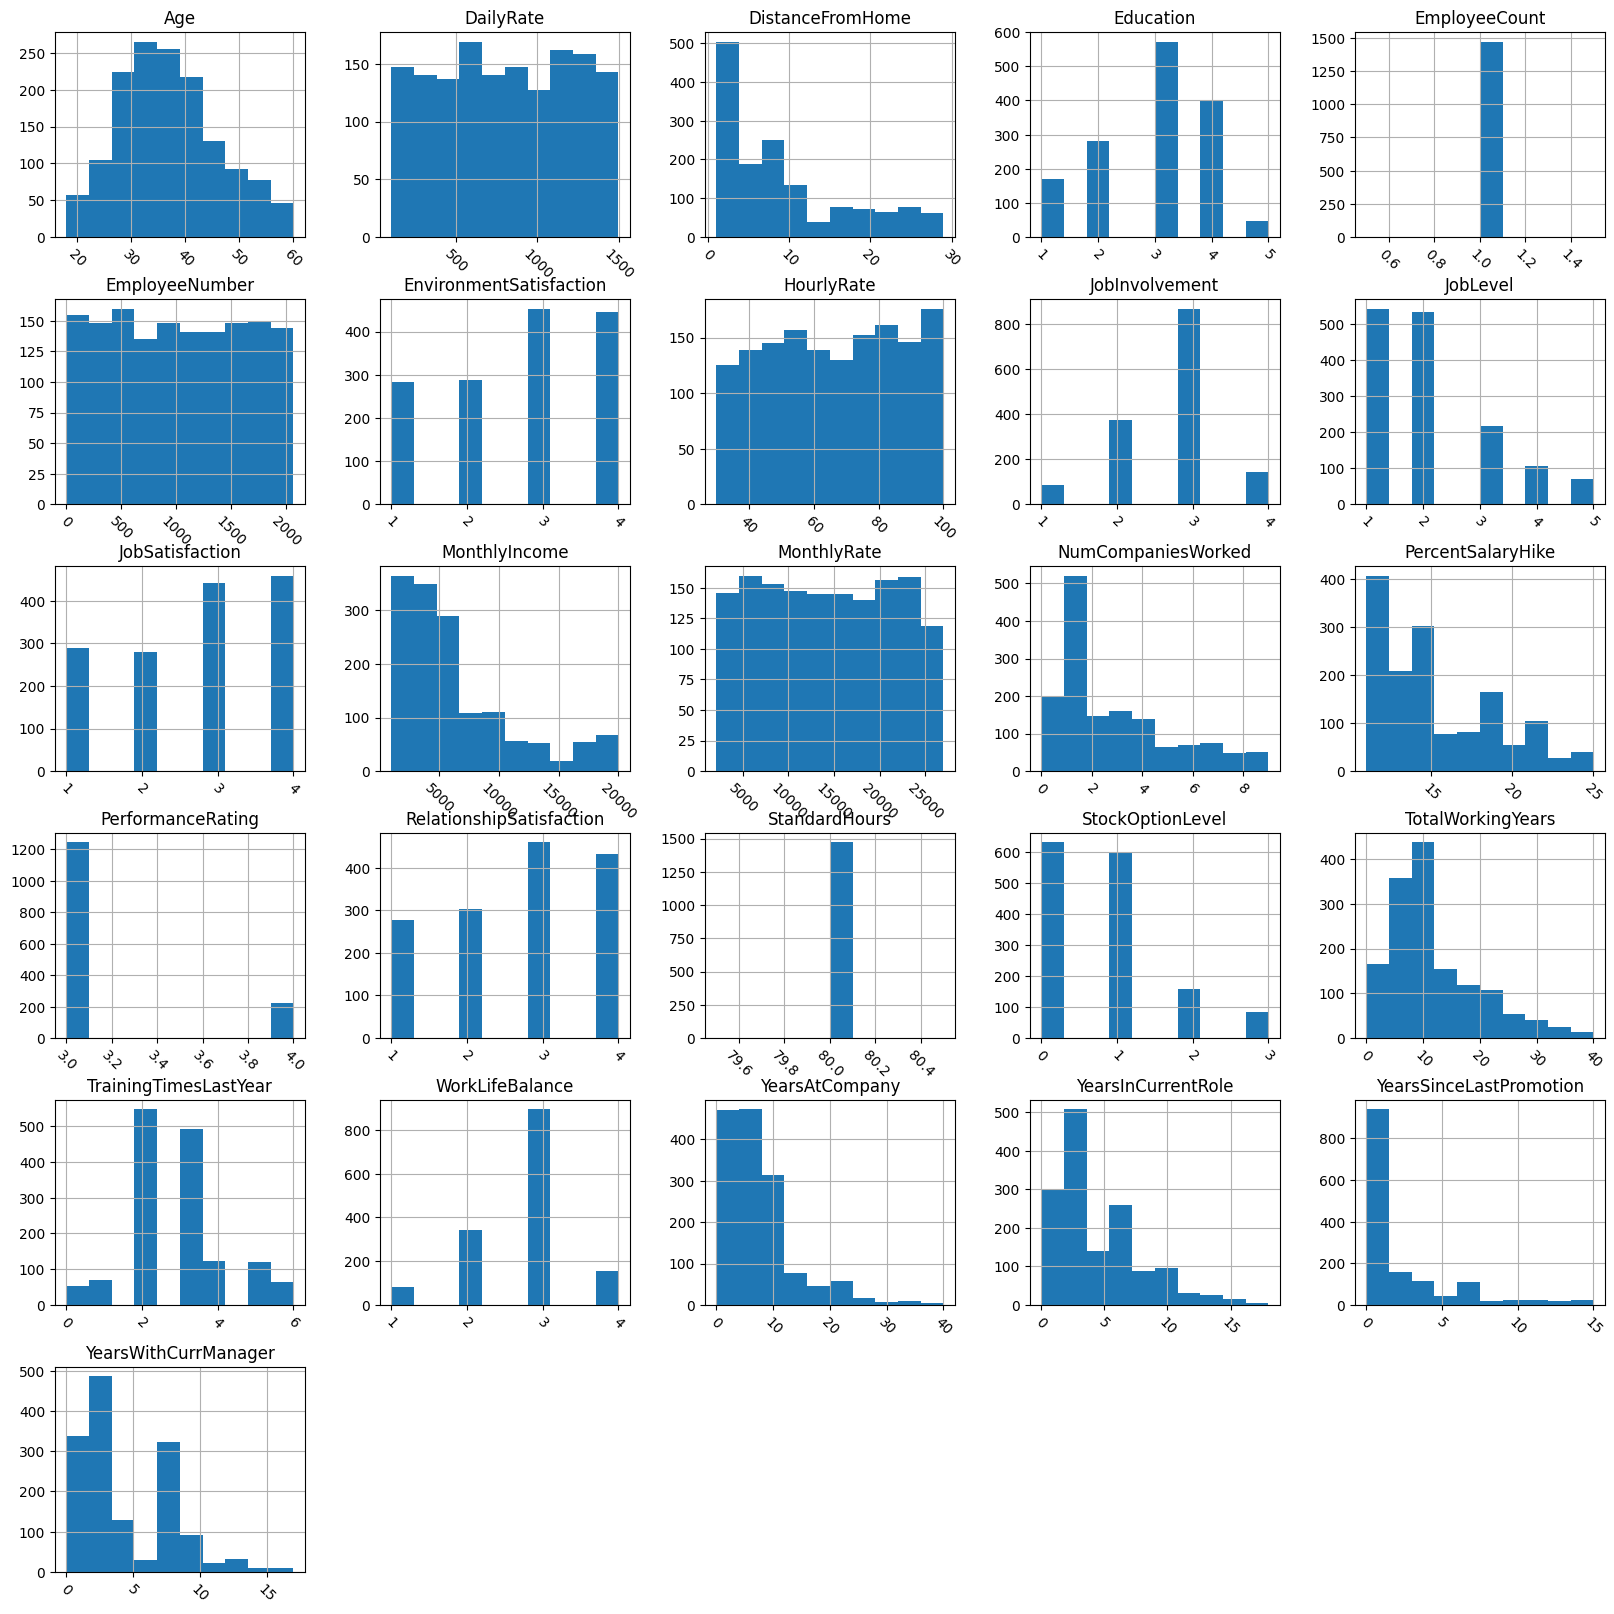

In [ ]:
# histogram for numerical columns
df.hist(figsize=(20,20), xrot=-45)
plt.show()



*   Over18: All values are Y
*   EmployeeCount: all values are 1.0
*   StandardHours: all values are 80.0
*   EmployeeNumber: is the id of the employee that has the same meaning as the index of each line



In [ ]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# find the unique value set of categorical attributes
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))

In [ ]:
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  OverTime {'Yes', 'No'}
Unique values of  JobRole {'Laboratory Technician', 'Research Director', 'Healthcare Representative', 'Manager', 'Sales Executive', 'Manufacturing Director', 'Research Scientist', 'Sales Representative', 'Human Resources'}
Unique values of  EducationField {'Other', 'Marketing', 'Technical Degree', 'Medical', 'Life Sciences', 'Human Resources'}
Unique values of  Over18 {'Y'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
Unique values of  Department {'Sales', 'Human Resources', 'Research & Development'}
Unique values of  Attrition {'Yes', 'No'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  MaritalStatus {'Divorced', 'Single', 'Married'}


In [ ]:
# Calculate the number of different values using the nunique() method.
n_values_df = pd.DataFrame({'n_values': df[cat_cols].nunique()})
n_values_df

,n_values
OverTime,2
JobRole,9
EducationField,6
Over18,1
BusinessTravel,3
Department,3
Attrition,2
Gender,2
MaritalStatus,3


In [ ]:
# Calculate the ratio of each value using the value_counts() method
value_ratios_dict = {}
for col in cat_cols:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({'value_ratios': value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[cat_cols]
value_ratios_df

,OverTime,JobRole,EducationField,Over18,BusinessTravel,Department,Attrition,Gender,MaritalStatus
value_ratios,"{'No': 71.70068027210884, 'Yes': 28.2993197278...","{'Sales Executive': 22.176870748299322, 'Resea...","{'Life Sciences': 41.224489795918366, 'Medical...",{'Y': 100.0},"{'Travel_Rarely': 70.95238095238095, 'Travel_F...","{'Research & Development': 65.37414965986395, ...","{'No': 83.87755102040816, 'Yes': 16.1224489795...","{'Male': 60.0, 'Female': 40.0}","{'Married': 45.78231292517007, 'Single': 31.97..."


#  Machine Learning Models

## I. The problem posed

### Problem posed:

Predict whether employees are at risk of leaving the company.

### General introduction:

In machine learning, supervised learning is a group of popular algorithms in this field and one of the important problems of supervised learning is the classification problem.
There are two common types of classification: binary classification and multi-classification, and in the problem that the group poses, this is a binary classification problem: from the input attributes of an employee such as the total number of years of work, salary level, satisfaction with the working environment, ... predicts whether that employee is at risk of leaving the current company (whether the company loses employees or not) (0: No / 1: Yes ).


## II. Data preprocessing

In [ ]:
df_ml=df.copy()
df_ml.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1. Encoding category attributes in numerical form

In [ ]:
cat_cols=df_ml.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
#count the number of distinct values in each of the above category attributes
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

In [ ]:
#remove attribute 'Over18' because it only has one value
df_ml.drop(['Over18'],axis=1, inplace=True)

In [ ]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_ml['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_ml['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_ml['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
# convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_ml=pd.get_dummies(df_ml, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [ ]:
df_ml.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


### 2. Eliminate the attributes that do not make sense for the problem

Step 1:

The 'Over18' attribute example is removed above because they only carry a value of 'yes', understandable the dataset is provided by IBM, based in the US, and the US only allows work when 18 years old or older. In addition, the column 'StandardHours' will also make no sense for the problem because this column carries the same value for all employees.

In [ ]:
#delete 'StandardHours'
df_ml.drop(['StandardHours'],axis=1,inplace=True)

Step 2:

The next step is to use the correlation values between each independent variable and dependent variable: Correlation is a commonly used statistical term that refers to the degree which two variables have a linear relationship with each other.
Correlation has the highest value of 1 (two variables are completely linear) and the lowest if the two variables do not have a linear relationship.
I will create a dataframe named 'correlations' containing the correlations of each column in the dataset to display the degree of correlation between variables.

In [ ]:
correlations=df_ml.corr()
correlations

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


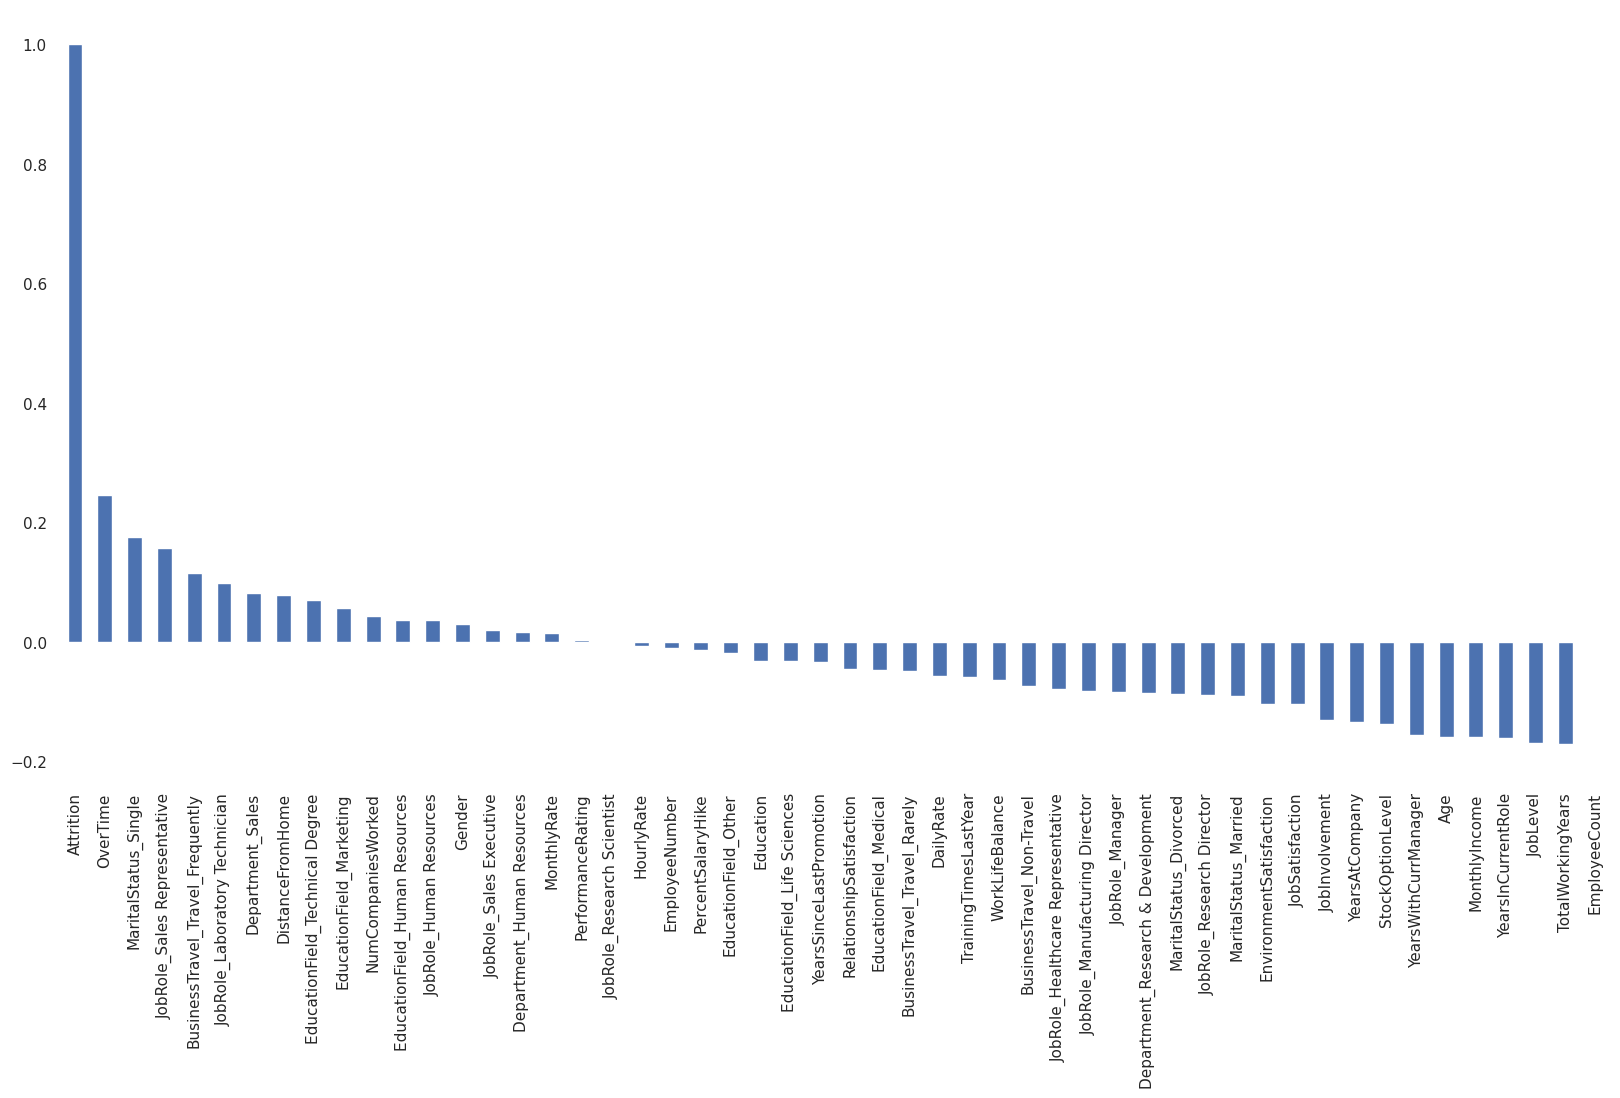

In [ ]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [ ]:
# It is immediately obvious that 'EmployeeCount' has absolutely no relation to 'Attrition'.
df_ml.drop(['EmployeeCount'],axis=1,inplace=True)

In [ ]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

Step 3:
Using correlations between independent variables:

The higher the correlation between two independent variables, the more similar information they bring to the context of the problem.
Therefore, when two independent variables have high correlation, one can be selected to apply to model training.

In [ ]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,MonthlyIncome,TotalWorkingYears,0.772893
3,PercentSalaryHike,PerformanceRating,0.773550
4,YearsAtCompany,YearsInCurrentRole,0.758754
5,YearsAtCompany,YearsWithCurrManager,0.769212
6,YearsInCurrentRole,YearsWithCurrManager,0.714365
7,Department_Human Resources,JobRole_Human Resources,0.904983
8,Department_Sales,JobRole_Sales Executive,0.808869




*   TotalWorkingYears, JobLevel and MonthlyIncome: Have very high correlation value. Choose to keep MonthlyIncome.
*   PercentSalaryHike and PerformanceRating: Have a correlation value of 0.77. Choose to keep PerformanceRating.
*   YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager: Have high correlation value. Choose to keep YearsAtCompany.
*   Department_Human Resources and JobRole_Human Resources: Have correlation value of 0.9. Choose to keep JobRole_Human Resources.
*   Department_Sales and JobRole_Sales Executive: Have correlation value of 0.8. Choose to keep JobRole_Sales Executive.

In [ ]:
df_ml.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

df_ml.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


## III. Building a machine learning model
1. Logistic Regression for Binary Classification
**Description of the problem:**

The objective of the binary classification problem is to predict the probability of belonging to one of the two classes.
In this dataset we will try to predict probability of belonging to class 0 or 1 of variable Attrition based on other independent attributes of an employee.

2. Using Pipeline and Metrics used to evaluate the model.
**Pipeline:**



*   Pipeline is a tool that helps combine multiple steps of data processing and model training into a complete process.
*   The steps to build a machine learning model will be sequentially in a Pipeline object (can be seen as a pipeline to lead through the steps one by one).
Pipeline saves time and optimizes model training.

**Measurements:**

The measures used by the team in this lesson will be:

*   Accuracy score.
*   Precision.
*   Recall.
*   F1-score.


3. Implement



In [ ]:
# Create a set of input attributes and a set of target variables from the original data set.
X=np.array(df_ml.drop(['Attrition'],axis=1))
y=np.array(df_ml['Attrition'])

In [ ]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]])

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
# Divide data set into training set and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


In [ ]:
# Model Settings:
# liblinear is suitable for small dateset
# Penalizing a Machine Leaning algorithm essentially means that you do not want your algorithm to be overfitted to your data

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=10000,
                                    solver='liblinear'))])

In [ ]:
#predict
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


In [ ]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294





*   Other measures such as Precision, Recall and F1-score are all very low in class 1 than in class 0, proving that the predictive model is not good for predicting fields that actually belong to class 1 (or say it). In this context are samples that belong to the negative class.
*   And this makes us think of the case of imbalanced data.





<Axes: xlabel='Attrition', ylabel='count'>

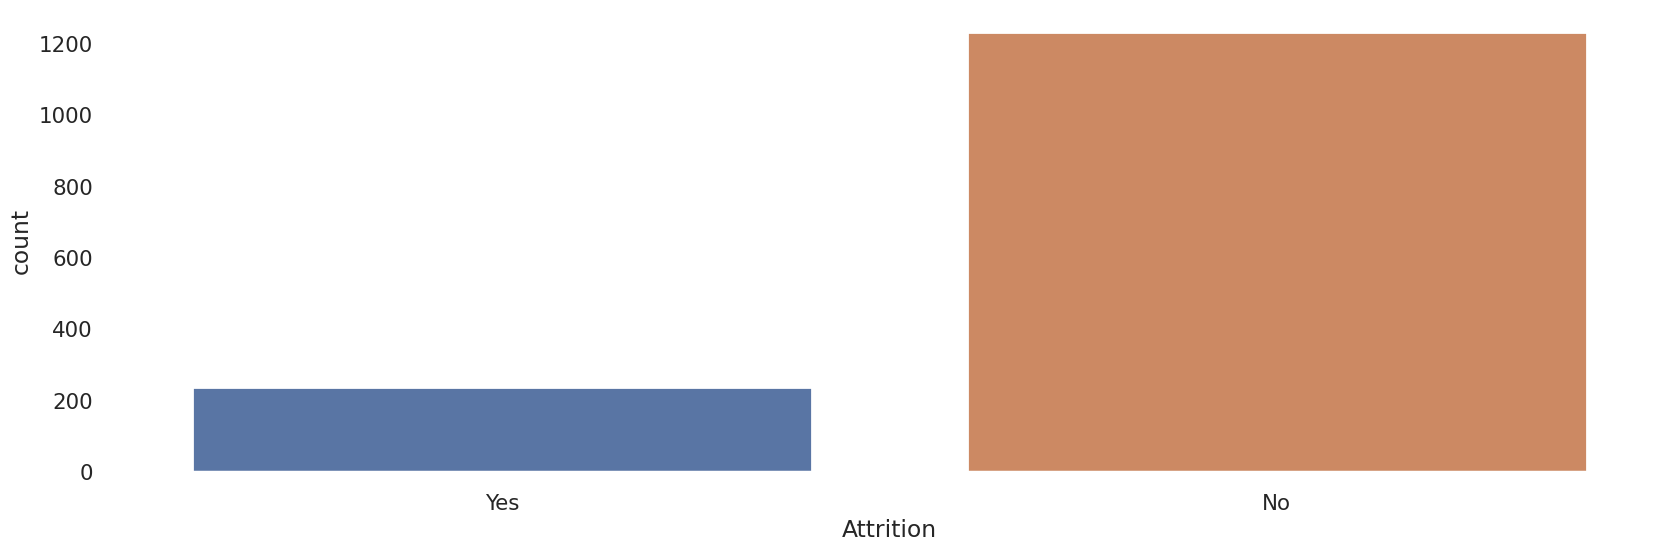

In [ ]:
# Check data balance:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attrition'])



*   It is clear that an imbalance occurs between classes 0 and 1 when the number of elements of class 0 in this dataset is approximately 6 times the number of elements of class 1.
*  This serious imbalance greatly affects the accuracy of the model.





In [ ]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [ ]:
predictions2=pipe2.predict(X_test)
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [ ]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294




*   Using a larger weight for class 1 has improved the precision and f1-score of class 1 significantly, showing that the overarching of the model has been increased. However, these measures have not yet reached a really good value for a classification problem.
*   And the group also experimented with many different weight pairs, but the best result was {0:1, 1:2}.



In [ ]:
# Apply SMOTE algorithm
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

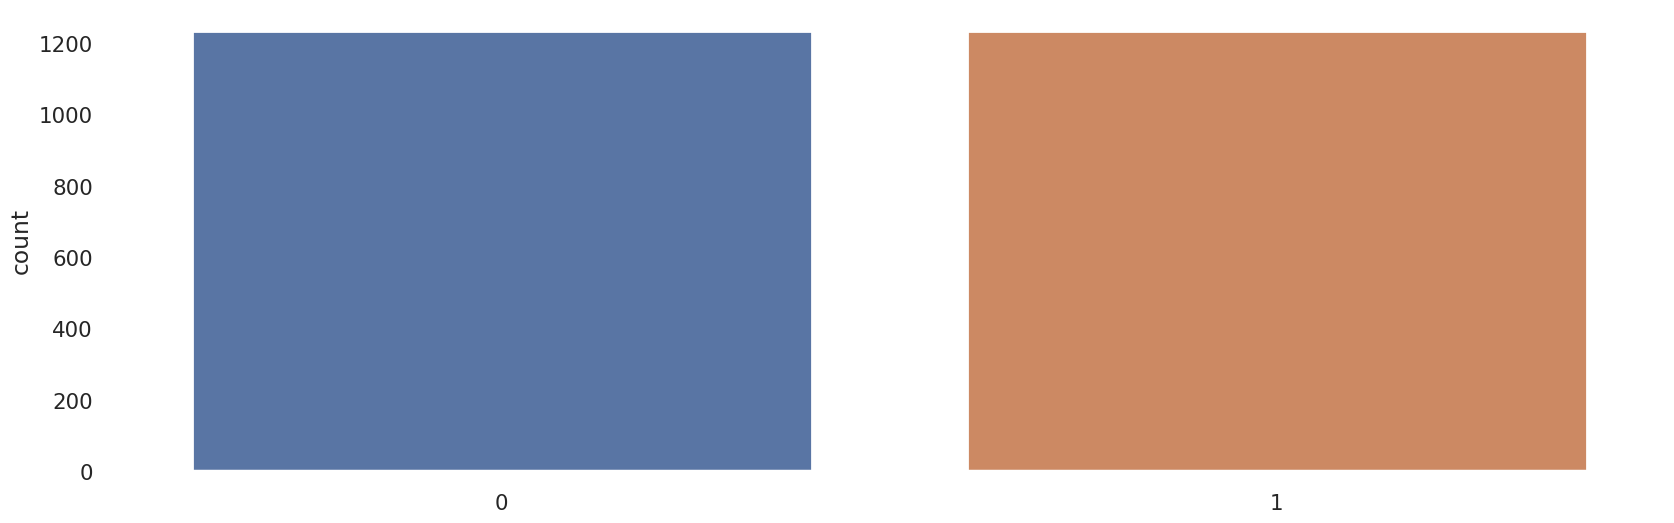

In [ ]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

In [ ]:
# Divide data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


In [ ]:
# model setting
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=10000,
                                    solver='liblinear'))])

In [ ]:
# prediction
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [ ]:
#Model rating
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [ ]:
#More detailed look at other metric values like F1-score or Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494




*   All measures are at 90% or more, showing the effectiveness of the SMOTE algorithm on this dataset.


